  Exploratory Data Analysis on Insurance Data

    About Data
This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits, geographic factors), and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.
Age: The insured person's age.

Sex: Gender (male or female) of the insured.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Children: The number of dependents covered.

Smoker: Whether the insured is a smoker (yes or no).

Region: The geographic area of coverage.

expenses: The medical insurance costs incurred by the insured person.

Ask and Answer Questions
1. What is the distribution of insurance expenses among smokers vs. non-smokers?
2. What is the average medical insurance expense by region?
3. How do the number of children (dependents) influence medical insurance expenses?
4. How does BMI correlate with medical insurance expenses?
5. How does age affect medical insurance expenses?
6. What is the distribution of gender among the insured?

Import libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

Read the data

In [6]:
data=pd.read_csv("/home/kimath/Desktop/Data_analysis/insurance.csv")

In [7]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [10]:
data.shape

(1338, 7)

In [11]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check for null values

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Statistical Summary of the data

In [14]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Check for duplicated data

In [15]:
data.shape

(1338, 7)

In [16]:
data=data.drop_duplicates()

In [17]:
data.shape

(1337, 7)

Data Visualization

1. What is the distribution of insurance expenses among smokers vs. non-smokers?

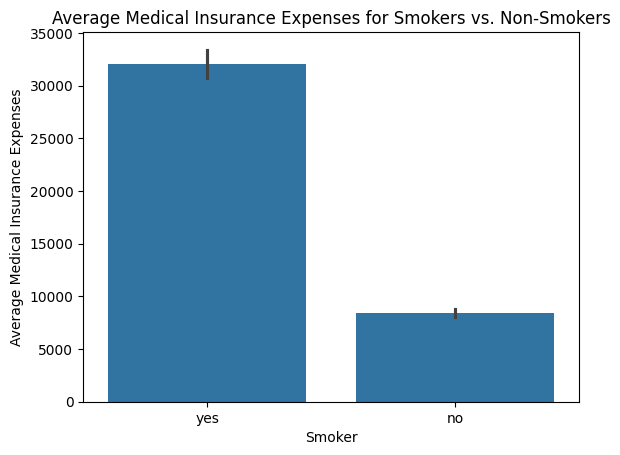

In [18]:
sns.barplot(x='smoker', y='expenses', data=data)
plt.xlabel('Smoker')
plt.ylabel('Average Medical Insurance Expenses')
plt.title('Average Medical Insurance Expenses for Smokers vs. Non-Smokers')
plt.show()


2. What is the average medical insurance expense by region?

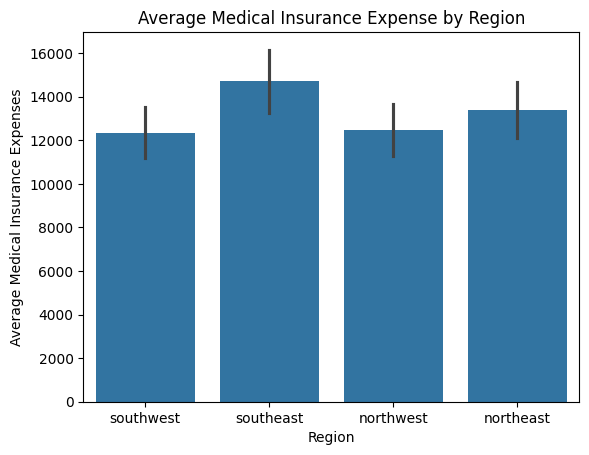

In [19]:
sns.barplot(x='region', y='expenses', data=data)
plt.xlabel('Region')
plt.ylabel('Average Medical Insurance Expenses')
plt.title('Average Medical Insurance Expense by Region')
plt.show()


3. How do the number of children (dependents) influence medical insurance expenses?

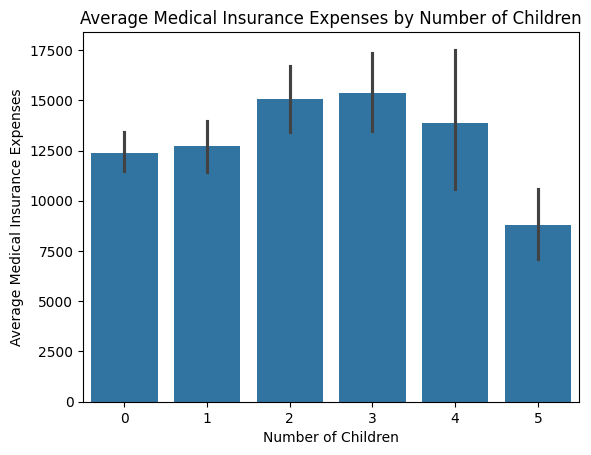

In [20]:
sns.barplot(x='children', y='expenses', data=data)
plt.xlabel('Number of Children')
plt.ylabel('Average Medical Insurance Expenses')
plt.title('Average Medical Insurance Expenses by Number of Children')
plt.show()


4. How does BMI correlate with medical insurance expenses?

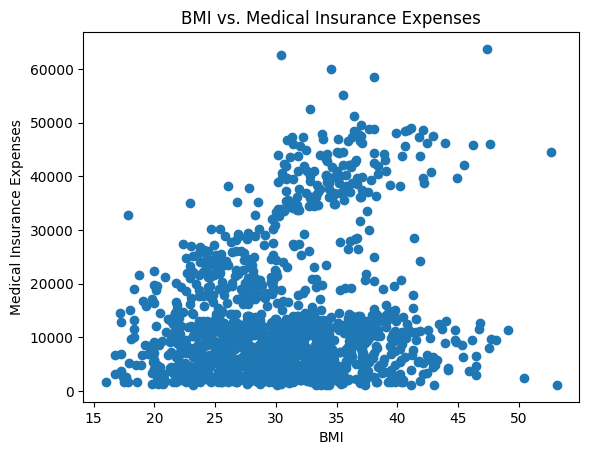

In [21]:
plt.scatter(data['bmi'], data['expenses'])
plt.xlabel('BMI')
plt.ylabel('Medical Insurance Expenses')
plt.title('BMI vs. Medical Insurance Expenses')
plt.show()


5. How does age affect medical insurance expenses?

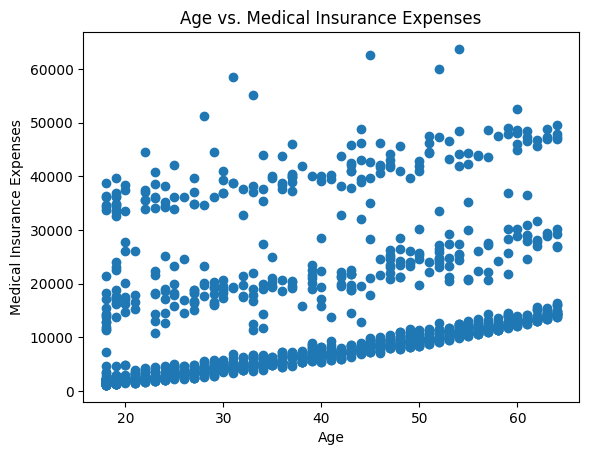

In [22]:
plt.scatter(data['age'], data['expenses'])
plt.xlabel('Age')
plt.ylabel('Medical Insurance Expenses')
plt.title('Age vs. Medical Insurance Expenses')
plt.show()


6. What is the distribution of gender among the insured?

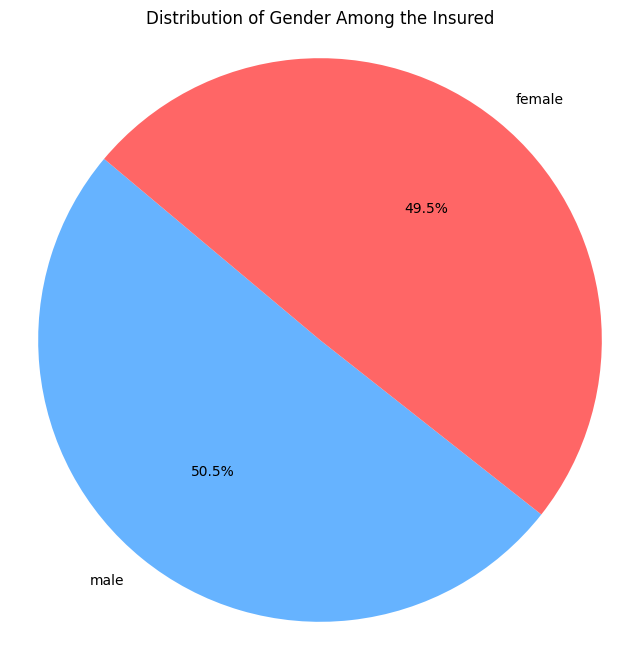

In [23]:
gender_counts = data['sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title('Distribution of Gender Among the Insured')
plt.axis('equal') 
plt.show()

Model Training



Check for categorical columns and convert to numerical columns

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [25]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [26]:
data['sex']=data.sex.map({'female':0,'male':1})

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [28]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [29]:
data['smoker']=data.smoker.map({'no':0,'yes':1})

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [31]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
data['region']=data.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [33]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


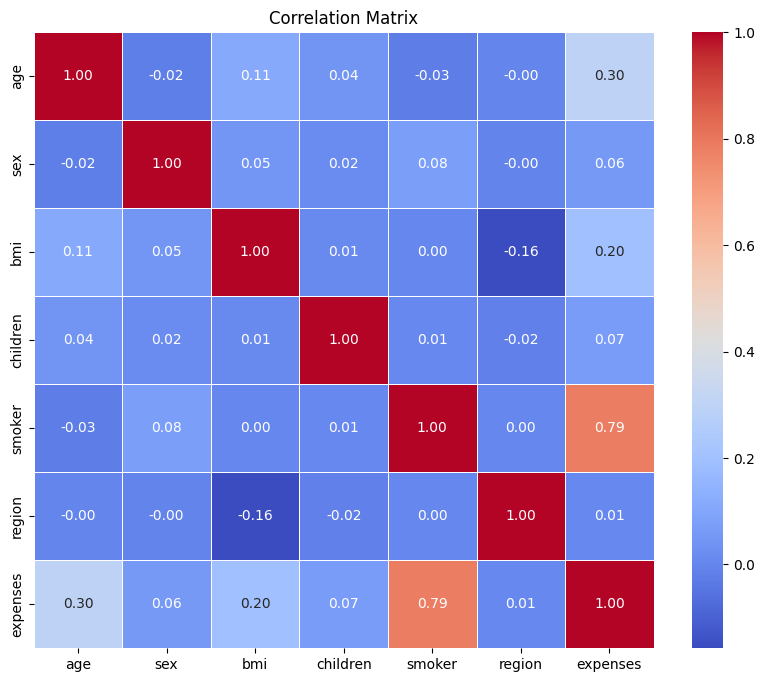

In [35]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

split data into x and y

In [36]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [37]:
x=data.drop(['expenses'],axis=1)

In [38]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [39]:
y=data[['expenses']]

In [40]:
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


Train Test Split

In [41]:
import sklearn

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train.shape

(1069, 6)

In [45]:
x_test.shape

(268, 6)

Model training

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred=lr.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)
score1

0.8068280291899953

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [52]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
y_pred=rf.predict(x_test)

In [54]:
score2=r2_score(y_test,y_pred)
score2

0.8823425820352824

Final model is random forest regressor

In [55]:
rf.fit(x_train,y_train)

RandomForestRegressor()

Predict the new data

In [56]:
df={
    'age':19,
    'sex':0,
    'bmi':27.9,	
    'children':0,	
    'smoker':	1,
    'region':1

}
new_data=pd.DataFrame(df,index=[0])
new_data

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [57]:
pred=rf.predict(new_data)

In [58]:
data.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92


In [59]:
pred

array([17171.7978])

Save the model

In [60]:
import joblib

In [61]:
joblib.dump(rf,'random_forest_regressor')

['random_forest_regressor']